In [1]:
import pandas as pd
import numpy as np
# import nltk
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [2]:
df = pd.read_csv(r"D:\Project (New)\New folder\Daily-News-for-Stock-Market-Prediction\Combined_News_DJIA.csv")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

This label columns is about Dow Jones Industrial Average (DJIA) close value. <br>--> 1 means that Close value stayed the same. <br>--> 0 means close value changed.

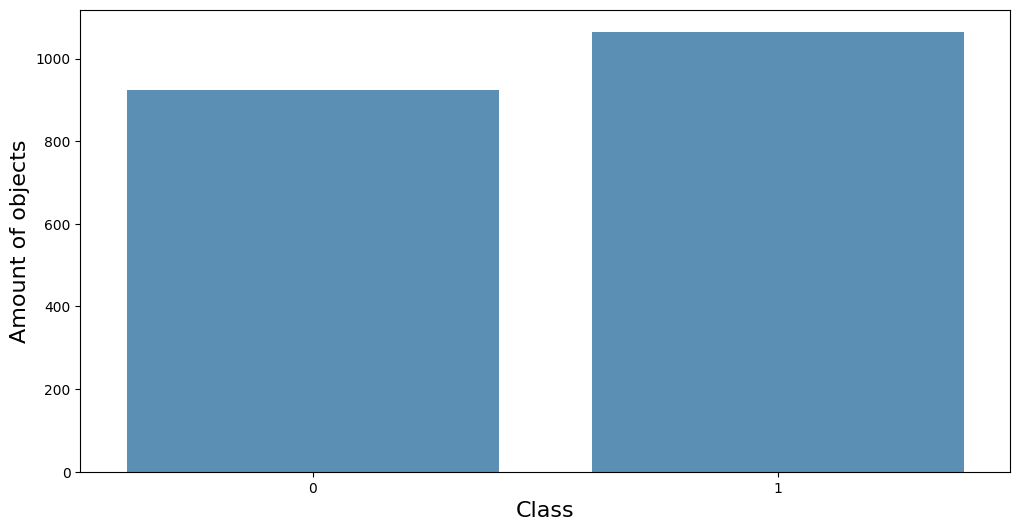

In [3]:
# Plot the Labels distribution
plt.figure(figsize=(12,6))
label_counts = df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']
sns.barplot(data=label_counts, x='Label', y='Count', alpha=0.8)
plt.ylabel('Amount of objects', fontsize=16)
plt.xlabel('Class', fontsize=16)
plt.show();

In [4]:
df['Label'].value_counts()

Label
1    1065
0     924
Name: count, dtype: int64

We have an almost equal class balance in the whole dataset.

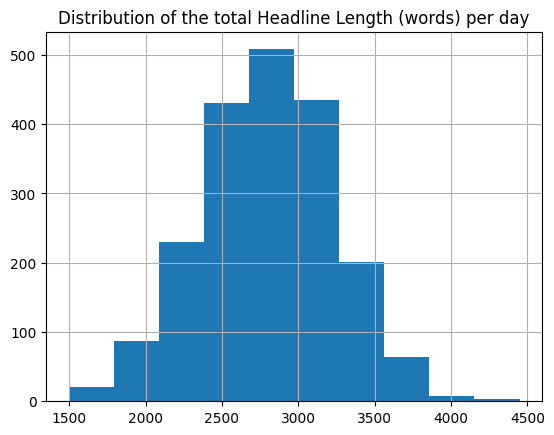

In [5]:
# Let 's calculate the histogram of the length of the headlines
df['headlines'] = df[df.columns[2:]].apply(lambda x: '. '.join(x.dropna().astype(str)),axis=1)
df['comment_length'] = df['headlines'].apply(lambda x : len(x))
df['comment_length'].hist()
plt.title('Distribution of the total Headline Length (words) per day')

# Drop the comment lenght column. After the plot we don 't need it.
df.drop(columns=['comment_length','headlines'], inplace=True)


In [6]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

The null values are few so we will just drop them.

In [7]:
df.dropna(subset=['Top23','Top24','Top25'], inplace=True)

In [8]:
df.shape

(1986, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1986 non-null   object
 1   Label   1986 non-null   int64 
 2   Top1    1986 non-null   object
 3   Top2    1986 non-null   object
 4   Top3    1986 non-null   object
 5   Top4    1986 non-null   object
 6   Top5    1986 non-null   object
 7   Top6    1986 non-null   object
 8   Top7    1986 non-null   object
 9   Top8    1986 non-null   object
 10  Top9    1986 non-null   object
 11  Top10   1986 non-null   object
 12  Top11   1986 non-null   object
 13  Top12   1986 non-null   object
 14  Top13   1986 non-null   object
 15  Top14   1986 non-null   object
 16  Top15   1986 non-null   object
 17  Top16   1986 non-null   object
 18  Top17   1986 non-null   object
 19  Top18   1986 non-null   object
 20  Top19   1986 non-null   object
 21  Top20   1986 non-null   object
 22  Top21   1986 non-null   objec

In [10]:
df.duplicated().sum()

np.int64(0)

According to the Dataset publisher on Kaggle older data is better to used as training set (2008-08-08 to 2014-12-31) and newer data for test set (from 2015-01-02 to 2016-07-01).<br> This recommendation roughly 80%/20% split.

In [45]:
# Define the test and training data
df_train = df[df['Date'] < '2015-01-01']
df_test = df[df['Date'] > '2014-12-31']
print(f"Training length is: {len(df_train)} \nTesting length is: {len(df_test)}")

Training length is: 1608 
Testing length is: 378


In [12]:
# We need to see the whole text on the dataframe that 's why we need to display.max_colwidth
pd.set_option('display.max_colwidth', None)

# Let 's just visualize a sample of what 's going on with these headers
display(df_train.head(4).iloc[:, 2:4])

,Top1,Top2
0,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""",b'BREAKING: Musharraf to be impeached.'
1,"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'",b'Bush puts foot down on Georgian conflict'
2,"b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'","b""Russia 'ends Georgia operation'"""
3,b' U.S. refuses Israel weapons to attack Iran: report',"b""When the president ordered to attack Tskhinvali [the capital of South Ossetia], we knew then we were doomed. How come he didn't realize that?"""


## Preprocessing

Steps that we need to follow:<br>

a) Lowercasing the data.<br>

b) Remove Puntuations.<br>

c) Remove stopwords. Why we need to remove stopwords?<br>
 _Stop words are only for sentence formation but in the meaning of the sentence, stop words are not important. Examples of stopwords are 'the', 'is', 'and' etc._

d) Remove emojis, HTML Tags , ChatWords. It is really unexpected to get emojis and ChatWords on reddit headings but we should implement a function to be ensure accurate analysis and text understanding.

e) _Tokenization is a crucial step in NLP text preprocessing where text is segmented into smaller units, typically words or subwords, known as tokens. This process is essential for several reasons. Firstly, it breaks down the text into manageable units for analysis and processing. Secondly, it standardizes the representation of words, enabling consistency in language modeling tasks. Additionally, tokenization forms the basis for feature extraction and modeling in NLP, facilitating tasks such as sentiment analysis, named entity recognition, and machine translation._

d) Apply Lemmatization instead of Stemming as in that way we can use deep learning / embeddings (Word2Vec, BERT)._Lemmatization reduce words to their base or dictionary form (lemma), enhancing consistency and simplifying analysis._

In [13]:
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
import re, string

stopwords_list = stopwords.words('english')
translator = str.maketrans('', '', string.punctuation)
emoji_pattern = re.compile("[" 
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_data(dataset):
    data = dataset.copy()
    
    for col in data.columns[2:27]:
        def process_text(text):
            if not isinstance(text, str):
                return []
            text = text[1:] 
            text = text.lower()
            text = text.translate(translator)
            text = emoji_pattern.sub('', text)
            text = re.sub('<.*?>', '', text)
            tokens = word_tokenize(text)
            tokens = [t for t in tokens if t not in stopwords_list]
            # Lemmatize
            pos_tags = pos_tag(tokens)
            tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

            return tokens

        data[col] = data[col].apply(process_text)
    
    return data
clean_data(df)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"[georgia, down, two, russian, warplane, country, move, brink, war]","[break, musharraf, impeach]","[russia, today, columns, troop, roll, south, ossetia, footage, fight, youtube]","[russian, tank, move, towards, capital, south, ossetia, reportedly, completely, destroyed, georgian, artillery, fire]","[afghan, child, rap, impunity, un, official, say, sick, three, year, old, rap, nothing]","[150, russian, tank, enter, south, ossetia, whilst, georgia, shoot, two, russian, jet]","[break, georgia, invades, south, ossetia, russia, warn, would, intervene, sos, side]","[enemy, combatent, trial, nothing, sham, salim, haman, sentence, 5, 12, year, keep, long, anyway, feel, like]",...,"[georgia, invades, south, ossetia, russia, get, involve, nato, absorb, georgia, unleash, full, scale, war]","[alqaeda, face, islamist, backlash]","[condoleezza, rice, u, would, act, prevent, israeli, strike, iran, israeli, defense, minister, ehud, barak, israel, prepare, uncompromising, victory, case, military, hostility]","[busy, day, european, union, approve, new, sanction, iran, protest, nuclear, programme]","[georgia, withdraw, 1000, soldier, iraq, help, fight, russian, force, georgias, breakaway, region, south, ossetia]","[pentagon, think, attack, iran, bad, idea, u, news, amp, world, report]","[caucasus, crisis, georgia, invades, south, ossetia]","[indian, shoe, manufactory, series, like, work]","[visitor, suffer, mental, illness, ban, olympics]","[help, mexicos, kidnapping, surge]"
1,2008-08-11,1,"[wont, america, nato, help, u, wont, help, u, help, iraq]","[bush, put, foot, georgian, conflict]","[jewish, georgian, minister, thanks, israeli, train, fending, russia]","[georgian, army, flees, disarray, russian, advance, gori, abandon, russia, without, shot, fire]","[olympic, open, ceremony, firework, fake]","[mossad, fraudulent, new, zealand, passport, iraq]","[russia, anger, israeli, military, sale, georgia]","[american, citizen, live, sossetia, blame, u, georgian, leader, genocide, innocent, people]",...,"[israel, u, behind, georgian, aggression]","[believe, tv, neither, russian, georgian, much, victim]","[riot, still, go, montreal, canada, police, murder, boy, saturday]","[china, overtake, u, large, manufacturer]","[war, south, ossetia, pic]","[israeli, physician, group, condemn, state, torture]","[russia, beaten, united, state, head, peak, oil]","[perhaps, question, georgia, russia, conflict]","[russia, much, well, war]","[come, trading, sex, food]"
2,2008-08-12,0,"[remember, adorable, 9yearold, sang, open, ceremony, fake]","[russia, end, georgia, operation]","[sexual, harassment, would, child]","[alqaeda, lose, support, iraq, brutal, crackdown, activity, regard, unislamic, include, woman, buy, cucumber]","[ceasefire, georgia, putin, outmaneuvers, west]","[microsoft, intel, try, kill, xo, 100, laptop]","[stratfor, russogeorgian, war, balance, power]","[im, try, get, sense, whole, georgiarussia, war, vote, think, georgia, start, think, russia]",...,"[u, troop, still, georgia, know, georgia, first, place]","[russias, response, georgia, right]","[gorbachev, accuse, u, make, serious, blunder, pursue, interest, caucasus, region]","[russia, georgia, nato, cold, war, two]","[remember, adorable, 62yearold, led, country, war, base, evidence, fake]","[war, georgia, israeli, connection]","[sign, point, u, encouraging, georgia, invade, south, ossetia, goddamnit, bush]","[christopher, king, argues, u, nato, behind, georgian, invasion, south, ossetia, misjudge, russian, resolve]","[america, new, mexico]","[bbc, news, asiapacific, extinction, man, climate]"
3,2008-08-13,0,"[u, refuse, israel, weapon, attack, iran, report]","[president, order, attack, tskhinvali, capital, south, ossetia, knew, doom, come, didnt, realize]","[israel, clear, troop, kill, reuters, cameraman]","[britain, policy, tough, drug, pointless, say, former, civil, se

In [1]:
from itertools import chain

# Clean the data
df_clean = clean_data(df)

# Combine all tokens from text columns
all_tokens = list(
    chain.from_iterable(
        df_clean[df_clean.columns[2:27]].values.flatten()
    )
)

# Remove empty tokens just in case
all_tokens = [t for t in all_tokens if isinstance(t, str)]
from collections import Counter
import matplotlib.pyplot as plt

unigram_freq = Counter(all_tokens)
top_25_unigrams = unigram_freq.most_common(25)

words, counts = zip(*top_25_unigrams)

plt.figure(figsize=(10, 6))
plt.barh(words[::-1], counts[::-1])
plt.title("Top 25 Most Common Unigrams")
plt.xlabel("Frequency")
plt.show()
from nltk.util import bigrams

bigram_tokens = list(bigrams(all_tokens))
bigram_freq = Counter(bigram_tokens)

top_25_bigrams = bigram_freq.most_common(25)

bigrams_words = [' '.join(b) for b, _ in top_25_bigrams]
bigram_counts = [count for _, count in top_25_bigrams]

plt.figure(figsize=(10, 6))
plt.barh(bigrams_words[::-1], bigram_counts[::-1])
plt.title("Top 25 Most Common Bigrams")
plt.xlabel("Frequency")
plt.show()


NameError: name 'clean_data' is not defined

In [15]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)',"b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'","b""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing""",b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.',"b""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side""","b""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it.""",...,"b'Georgia Invades South Ossetia - if Russia gets involved, will NATO absorb Georgia and unleash a full scale war?'",b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to prevent an Israeli strike on Iran."" Israeli Defense Minister Ehud Barak: ""Israel is prepared for uncompromising victory in the case of military hostilities.""'",b'This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.',"b""Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia""",b'Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report',b'Caucasus in crisis: Georgia invades South Ossetia',"b'Indian shoe manufactory - And again in a series of ""you do not like your work?""'",b'Visitors Suffering from Mental Illnesses Banned from Olympics',"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'",b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli training, we're fending off Russia """,b'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired',"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?',b'Russia angered by Israeli military sale to Georgia',b'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people',...,b'Israel and the US behind the Georgian aggression?',"b'""Do not believe TV, neither Russian nor Georgian. There are much more victims""'",b'Riots are still going on in Montreal (Canada) because police murdered a boy on Saturday.',b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Torture',b' Russia has just beaten the United States over the head with Peak Oil',b'Perhaps *the* question about the Georgia - Russia conflict ',b'Russia is so much better at war',"b""So this is what it's come to: trading sex for food."""
2,2008-08-12,0,"b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'","b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would have no children...""'","b""Al-Qa'eda is losing support in Iraq because of a brutal crackdown on activities it regards as un-Islamic - including women buying cucumbers""",b'Ceasefire in Georgia: Putin Outmaneuvers the West',b'Why Microsoft and Intel tried to kill the XO $100 laptop',b'Stratfor: The Russo-Georgian War and the Balance of Power ',"b""I'm Trying to Get a Sense of This Whole Georgia-Russia War: Vote Up If You Think Georgia Started It, Or Down If you Think Russia Did""",...,b'U.S. troops still in Georgia (did you know they were in Georgia in the first place?)',b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. 

# Words Embedding Techniques
Word embedding techniques provide a way to represent words as vectors in a continuous vector space. Word embeddings are numerical representations of words that show semantic similarities and correlations depending on how frequently they appear in a given dataset.<br> Through the conversion of words into continuous vector spaces, these representations enable machines to interpret and analyze human language with greater efficiency.

There are two major types of word Embeddings:

- The Frequency Bsed Embeddings (Bag Of Words, TF-IDF)
    - Bag-of-Words (BoW) is a text representation technique that represents a document as an unordered set of words and their respective frequencies.<br> It discards the word order and captures the frequency of each word in the document, creating a vector representation. 

    - Term Frequency-Inverse Document Frequency, commonly known as TF-IDF, is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus).

- Prediction Based Embeddings (Word2Vec)

    - Word2Vec  is a neural approach for generating word embeddings. It belongs to the family of neural word embedding techniques and specifically falls under <br> the category of distributed representation models. There are two neural embedding methods for Word2Vec: Continuous Bag of Words (CBOW) and Skip-gram.
    
        - Continuous Bag of Words (CBOW) is a type of neural network architecture used in the Word2Vec model. The primary objective of CBOW is to predict a target word based on its context, which consists of the surrounding words in a given window.

        - The Skip-Gram model learns distributed representations of words in a continuous vector space. The main objective of Skip-Gram is to predict context words (words surrounding a target word) given a target word. This is the opposite of the Continuous Bag of Words (CBOW) model, where the objective is to predict the target word based on its context

# Bow (Bag Of Words)

In [14]:
import pandas as pd

def concat_headings(df):
    cols = [f'Top{i}' for i in range(1, 26)]
    
    def to_str(x):
        if isinstance(x, list):
            return ' '.join(map(str, x))   
        if isinstance(x, bytes):
            return x.decode('utf-8', errors='ignore')
        if pd.isna(x):
            return ''
        return str(x)
    
    df[cols] = df[cols].applymap(to_str)

    df['text'] = df[cols].agg(' , '.join, axis=1)

    # Remove leading b' or b" and quotes
    df['text'] = df['text'].str.replace(r"^b[\"']|[\"']", '', regex=True)
    df = df['text']
    
    return df


In [15]:
# Concatenate the headings and clean the train data
df_train_conc = concat_headings(clean_data(df_train))

# Concatenate the headings and clean the test data
df_test_conc = concat_headings(clean_data(df_test))

C:\Users\Xaris\AppData\Local\Temp\ipykernel_16788\1383837401.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(to_str)
C:\Users\Xaris\AppData\Local\Temp\ipykernel_16788\1383837401.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(to_str)


In [31]:
df_train_conc.head()

0    georgia down two russian warplane country move brink war , break musharraf impeach , russia today columns troop roll south ossetia footage fight youtube , russian tank move towards capital south ossetia reportedly completely destroyed georgian artillery fire , afghan child rap impunity un official say sick three year old rap nothing , 150 russian tank enter south ossetia whilst georgia shoot two russian jet , break georgia invades south ossetia russia warn would intervene sos side , enemy combatent trial nothing sham salim haman sentence 5 12 year keep long anyway feel like , georgian troop retreat osettain capital presumably leave several hundred people kill video , u prep georgia war russia , rice give green light israel attack iran say u veto israeli military ops , announcingclass action lawsuit behalf american public fbi , sorussia georgia war nyts top story open ceremony olympics fuck disgrace yet proof decline journalism , china tell bush stay country affair , world war iii 

In [32]:
print(f'Shape of training data: {df_train_conc.shape}\n')
print(f'Shape of testing data: {df_test_conc.shape}')

Shape of training data: (1608,)

Shape of testing data: (378,)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer : Converts a collection of text documents to a matrix of token counts.
# Create and object for countvectorizer
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(df_train_conc)
print(f'The shape of the train data after the counter vectorization are: {basictrain.shape}\n')

basictest = basicvectorizer.transform(df_test_conc)
print(f'The shape of the test data after the transformation are: {basictest.shape}')

The shape of the train data after the counter vectorization are: (1608, 33648)

The shape of the test data after the transformation are: (378, 33648)


So what we 've got here?<br> For training data there are 33648 different words.<br> So we after this transformation (sentences --> vectors) we can apply classification algorithms.

In [35]:
from sklearn.linear_model import LogisticRegression
basicmodel = LogisticRegression()
# Train the logistic regression on the training data
basicmodel = basicmodel.fit(basictrain, df_train["Label"]) 
# Be carefull on this stage the basic train has only the text data! that why i took df_train['Label'] separate.
basictest = basicvectorizer.transform(df_test_conc)
predictions = basicmodel.predict(basictest)
y_true = df_test["Label"]
y_pred = predictions

In [36]:
# Metrics for this logistic regression is 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Precision: ", precision_score(y_true, y_pred, average='weighted'))
print("Recall: ", recall_score(y_true, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_true, y_pred, average='weighted'))

Accuracy:  0.455026455026455
Precision:  0.45129352955439916
Recall:  0.455026455026455
F1 Score:  0.44856168952998987



Confusion Matrix:



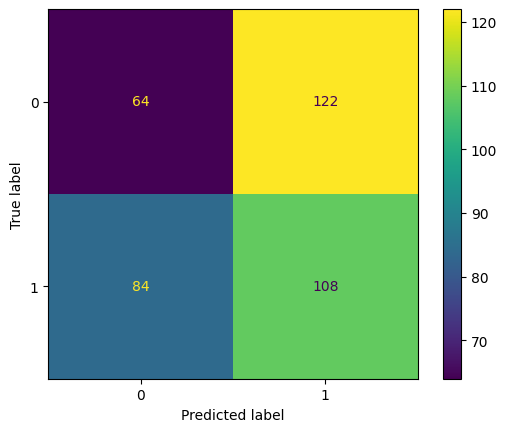

In [37]:
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_true, y_pred, labels=basicmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=basicmodel.classes_)
disp.plot()
plt.show()

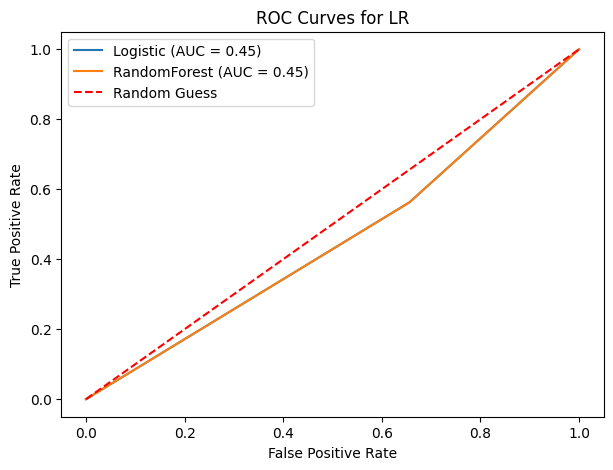

In [38]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LR')
plt.legend()
plt.show()

Prediction accuracy (for the testing set) is just 45%. It seems like this model isn't too reliable.

In [ ]:
# Let 's extract the most important words (the list of coefficients) from a CountVectorizer with Logistic Regression.
basicwords = basicvectorizer.get_feature_names_out()
basiccoeffs = basicmodel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(10)

,Word,Coefficient
13560,green,0.501855
25336,rench,0.491580
6851,chemical,0.478597
18227,london,0.472808
8216,create,0.453771
20092,mumbai,0.441561
27019,scrap,0.439899
20734,nigeria,0.436409
1337,45,0.421410
25371,reopen,0.419678


Bag Of Word Drawbacks: 
- Ordering of the words in the sentences is getting changes. So different sentences have the same meaning.
- Out of vocabulary issue. A new word cannot become a vector easily.
- Semantic meaning is not get capture (we cannot understand which word is more crucial than others).

# TF-IDF

In [40]:
# Concatenate the headings and clean the train data
df_train_conc = concat_headings(clean_data(df_train))

# Concatenate the headings and clean the test data
df_test_conc = concat_headings(clean_data(df_test))

C:\Users\Xaris\AppData\Local\Temp\ipykernel_10536\1383837401.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(to_str)
C:\Users\Xaris\AppData\Local\Temp\ipykernel_10536\1383837401.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(to_str)


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

sec_vectorizer = TfidfVectorizer(min_df=0.03, max_df= 0.97,strip_accents= 'unicode') # remove words with frequence lower than 3%.
advancedtrain  = sec_vectorizer.fit_transform(df_train_conc) # x_train
print(f'The shape of the train data after the TFI-DF vectorization are: {advancedtrain.shape}\n')

basictest = sec_vectorizer.transform(df_test_conc)  # x_test
print(f'The shape of the test data after the TFI-DF transformation are: {basictest.shape}')

The shape of the train data after the TFI-DF vectorization are: (1608, 1689)

The shape of the test data after the TFI-DF transformation are: (378, 1689)


In [43]:
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    AdaBoostClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Models i 'll use to classify the data
models = {
    'Decision Tree':DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "xgboost":XGBClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(), 
    'lightgbm':LGBMClassifier(),
    'LogisticRegression':LogisticRegression()
}   


# Create param grids for every and each of these algorithms
# Decision Tree Hyperparameters
params = {
"Decision Tree" : {  
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 10,20],
    'min_samples_split':[5, 10],
    'min_samples_leaf':[1,4,5]
},

# Random Forest Hyperparameters
"Random Forest" : {
    'n_estimators':[100],
    'max_depth':[2, 5],
    'min_samples_split':[2, 5],
    'min_samples_leaf':[2,10]
    },

# AdaBoost hyperparameters
"AdaBoost" : {
    'n_estimators':[100],
    'learning_rate':[0.05,0.1]
},

# Gradient Boosthyperparameters
"Gradient Boost" :{
    'learning_rate':[0.05,0.1],
    'n_estimators':[100],
    "max_depth": [2, 5]
},

# Xgboost hyperparameters
"xgboost" : {
    'n_estimators':[100],
    'learning_rate':[0.05,0.1],
    'max_depth':[2, 5]
},

# SVM hyperparameters
"SVM":{
    'C': [0.1, 1, 10], # regularization parameter
    'kernel':['linear','poly','sigmoid'],
    'gamma': [1, 0.1]
},
# KNN hyperparameters
'KNN' :{
    'n_neighbors':[3,5]
},

# lightgbm hyperparameters
"lightgbm": {
    "n_estimators": [100],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [31], # this is the default value
    'max_depth':[-1] 
},

# Logistic Regression hyperparameters
"LogisticRegression": {
    "C": [0.1, 1, 10],
    "penalty": ['l1',"l2",'elasticnet']
}
}


Start tuning the Decision Tree.

The best cross validation score (f1) for the Decision Tree is : 0.6679075412358264



Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.08      0.14       186
           1       0.51      0.93      0.66       192

    accuracy                           0.51       378
   macro avg       0.52      0.51      0.40       378
weighted avg       0.52      0.51      0.40       378



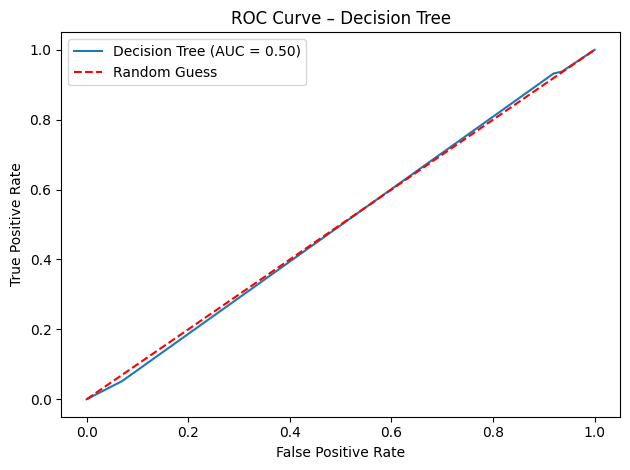

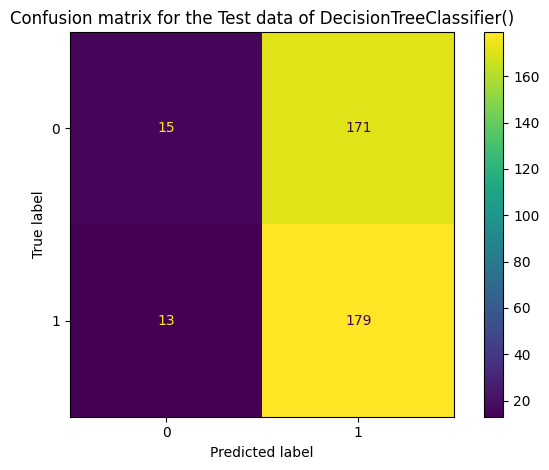

Start tuning the Random Forest.

The best cross validation score (f1) for the Random Forest is : 0.7024633431085044



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



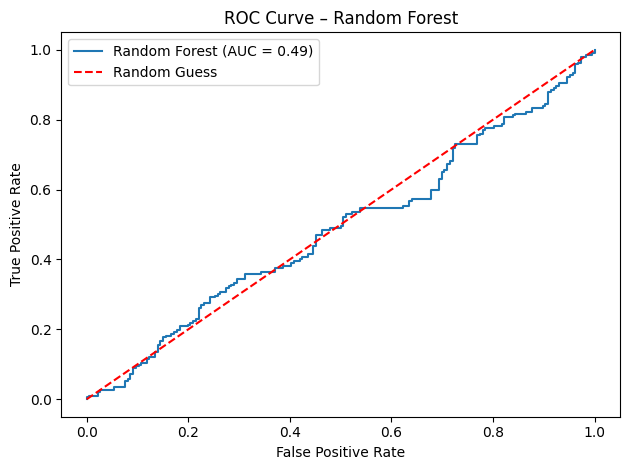

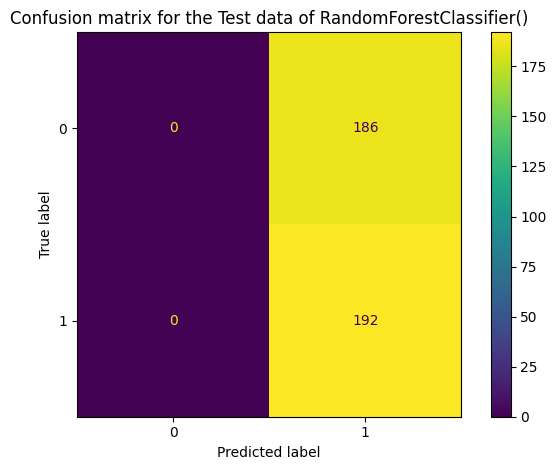

Start tuning the AdaBoost.

The best cross validation score (f1) for the AdaBoost is : 0.7021798631476052



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



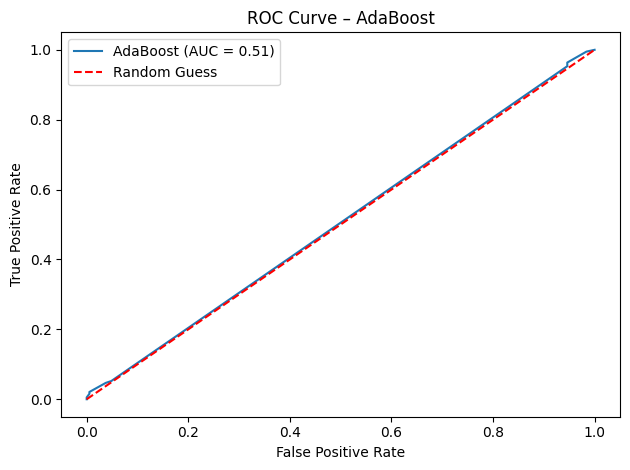

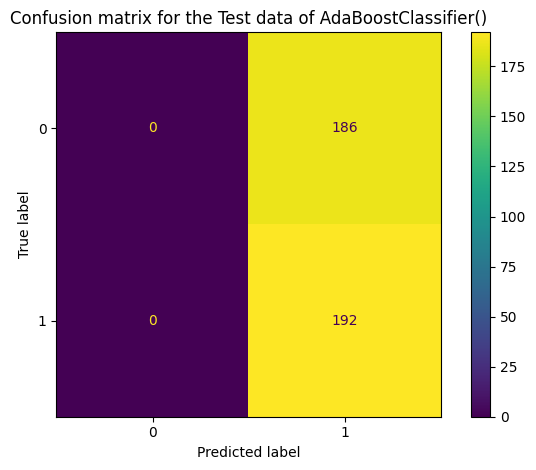

Start tuning the Gradient Boost.

The best cross validation score (f1) for the Gradient Boost is : 0.6292479517625859



Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.14      0.21       186
           1       0.50      0.83      0.62       192

    accuracy                           0.49       378
   macro avg       0.47      0.48      0.42       378
weighted avg       0.47      0.49      0.42       378



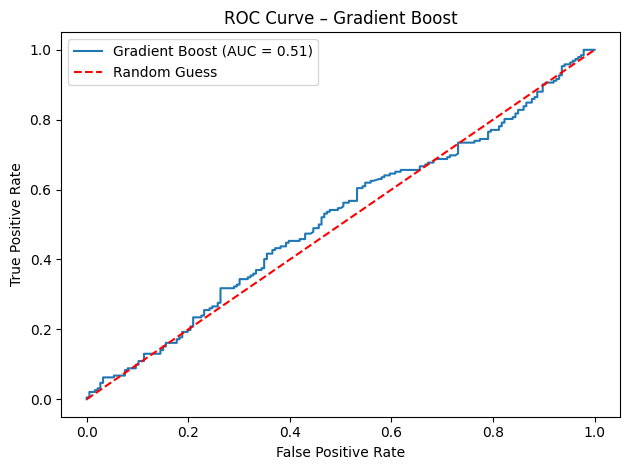

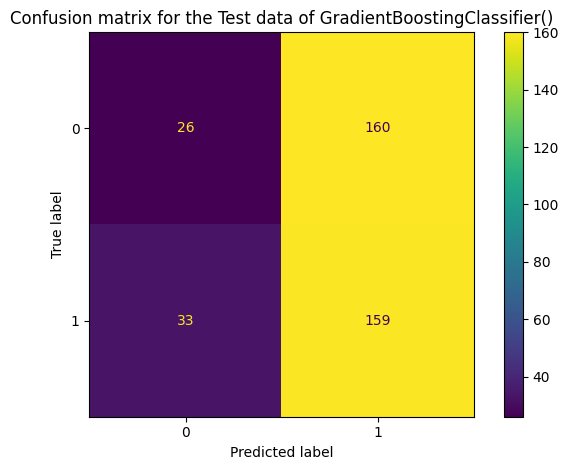

Start tuning the xgboost.

The best cross validation score (f1) for the xgboost is : 0.6337384119530162



Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.17      0.25       186
           1       0.50      0.81      0.62       192

    accuracy                           0.49       378
   macro avg       0.48      0.49      0.43       378
weighted avg       0.48      0.49      0.44       378



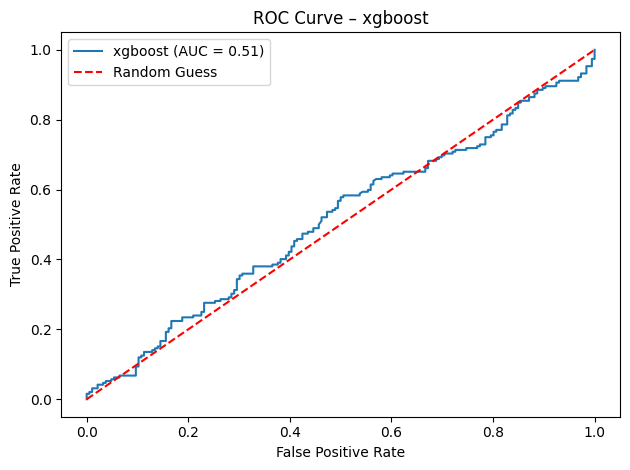

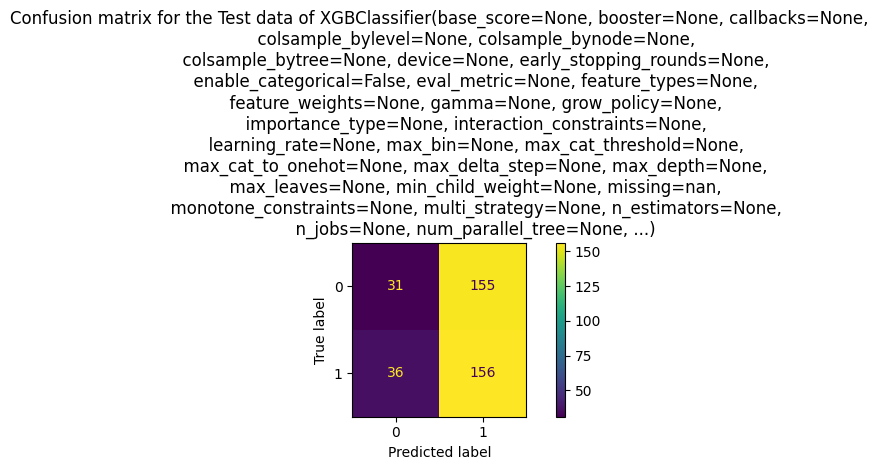

Start tuning the SVM.

The best cross validation score (f1) for the SVM is : 0.7021798631476052



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



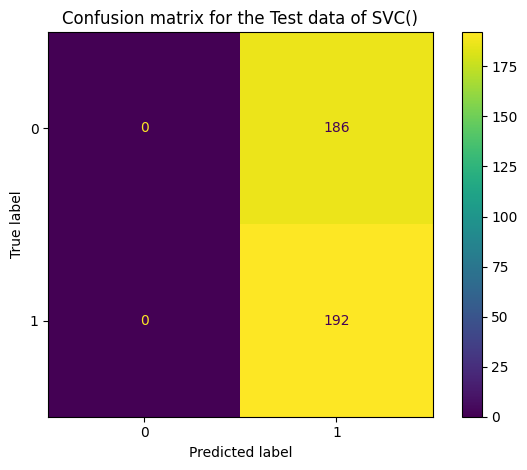

Start tuning the KNN.

The best cross validation score (f1) for the KNN is : 0.5573664554170352



Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.40      0.45       186
           1       0.52      0.62      0.57       192

    accuracy                           0.52       378
   macro avg       0.51      0.51      0.51       378
weighted avg       0.51      0.52      0.51       378



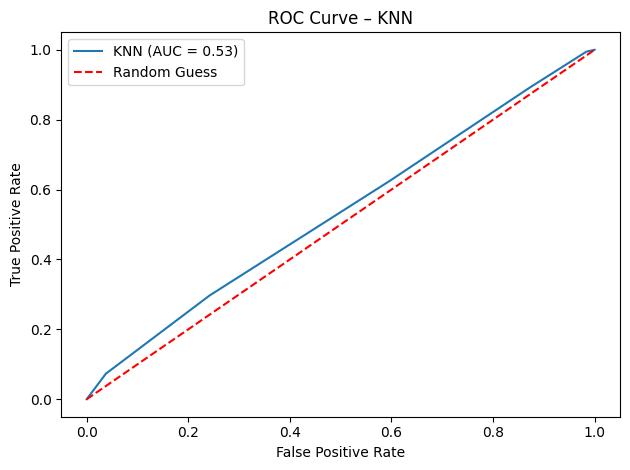

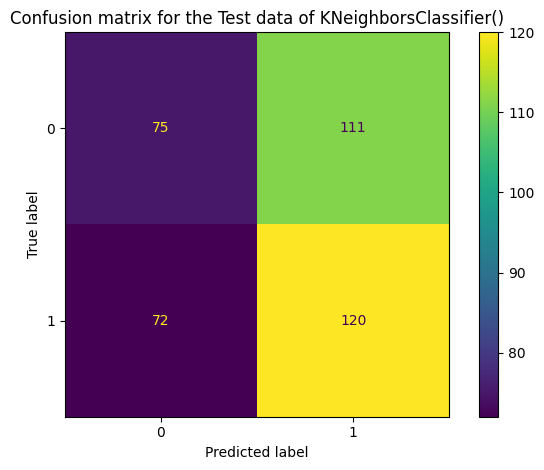

Start tuning the lightgbm.
[LightGBM] [Info] Number of positive: 870, number of negative: 738
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88668
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 1689
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541045 -> initscore=0.164549
[LightGBM] [Info] Start training from score 0.164549

The best cross validation score (f1) for the lightgbm is : 0.5820199156333591



Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.41      0.45       186
           1       0.51      0.60      0.56       192

    accuracy                           0.51       378
   macro avg       0.51      0.51      0.50       378
weighted avg       0.51      0.51      0.50       378



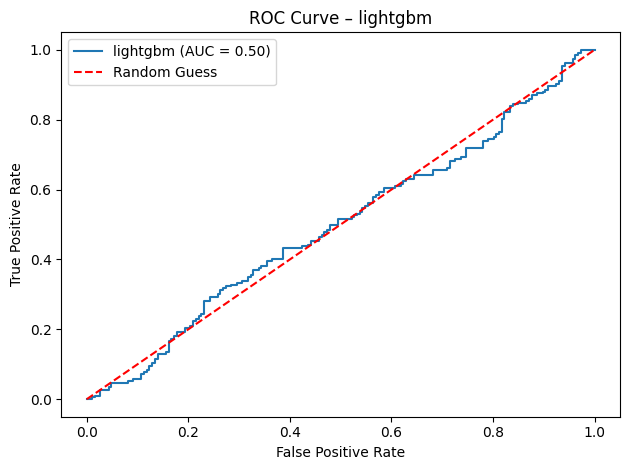

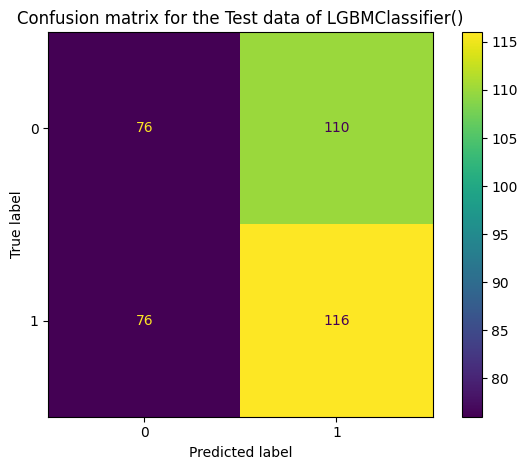

Start tuning the LogisticRegression.

The best cross validation score (f1) for the LogisticRegression is : 0.7021798631476052



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



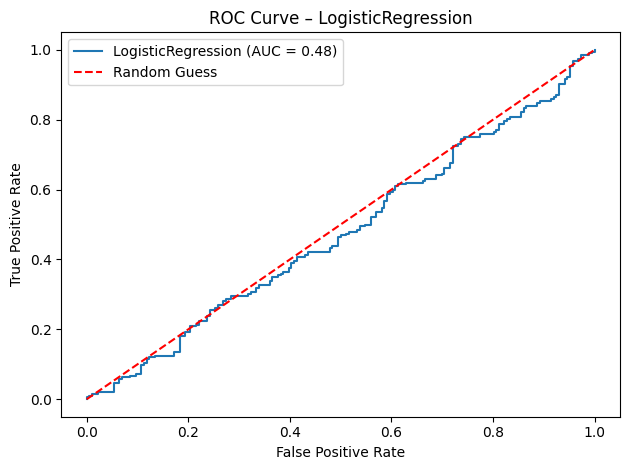

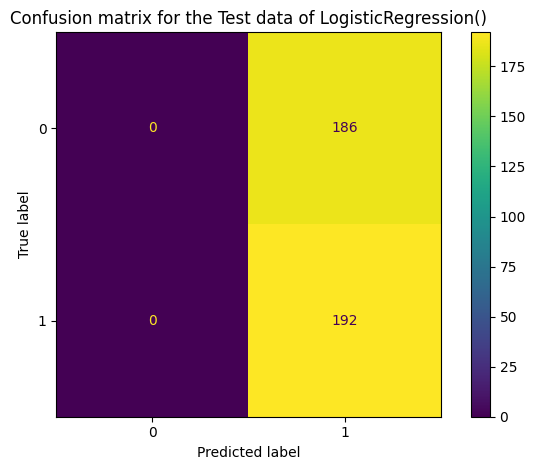

In [45]:
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, roc_auc_score,roc_curve,auc
warnings.filterwarnings("ignore")

# Empty dictionary to save all of the hyperparameter tuning results for each parameter.
result = {}

scoring = {'f1':'f1','accuracy': 'accuracy'}
for model_name, model in models.items():
    print(f"Start tuning the {model_name}.") # only for debugging purposes
    clf = model  # get the model
    hype = params[model_name] # get the hyperparameters for hyperparameter tuning
    
    # grid search cv to get the best combination of hyperparameters
    grid  = GridSearchCV(clf,  
                    hype, 
                    scoring='f1', 
                    n_jobs = -1, # To use the whole cpu and get faster results.
                    cv=5).fit(advancedtrain, df_train["Label"])
    
    # update the result dict
    result[model_name] = {
        "best_params": grid.best_params_, # Parameter setting that gave the best results on the hold out data.
        "best_f1": grid.best_score_,   # Mean cross-validated score of the best_estimator. 
        "best_model": grid.best_estimator_ # the best set of parameters
    }
    
    print(f'\nThe best cross validation score (f1) for the {model_name} is : {grid.best_score_}\n\n')
    best_model = grid.best_estimator_ # use the best estimetor to predict on the testing set 

    # ---- Test set evaluation ----
    y_pred = best_model.predict(basictest)

    print("\nClassification Report:")
    print(classification_report(df_test["Label"], y_pred))

    # ---- ROC / AUC (only if supported) ---- (For example SVM)
    if hasattr(best_model, "predict_proba"):
        y_pred_prob = best_model.predict_proba(basictest)[:, 1]

        fpr, tpr, _ = roc_curve(df_test["Label"], y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve – {model_name}')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    # Plot Confusion matrix on ax[1]
    cm = confusion_matrix(df_test["Label"], y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion matrix for the Test data of {model}')
    plt.tight_layout()
    plt.show()
    

What are all of those metrics means ?

- Accuracy is the ratio of correctly predicted instances to the total number of instances.<br>Accuracy is simple to understand and explain, making it ideal for situations in which all classes are equally significant and balanced.

- Precision is the proportion of all the model's positive classifications that are actually positive.

- Recall (The true positive rate), or the proportion of all actual positives that were classified correctly <br> as positives.

- F1 score combines both precision and recall and symmetrically represents them via a harmonic mean.<br> F1 scores can range from 0 to 1, with 1 representing a model that perfectly classifies each observation into the correct class and 0 representing <br> a model that is unable to classify any observation into the correct class.F1-score gives a more comprehensive evaluation, especially in <br> imbalanced datasets, by taking into account both false positives and false negatives.

# Drawbacks of TF-IDF

One limitation of TF-IDF is that it only works with words it has seen during training. So if a new word appears in a test document <br> a word that wasn't in the training corpus it becomes an Out-of-Vocabulary word and gets ignored.

In order to handle the drawbacks from both TF-IDF and Bow we can use Deep Learning Training Models (instead of Count or Frequency models). 

# Deep Learning Training Models (Neural Approach)

- Word2Vec (developed by google researchers) is a neural approach for generating word embeddings. It belongs to the family of neural word embedding techniques and specifically falls under the category of distributed representation models.

    - Continuous Bag of Words (CBOW) is a type of neural network architecture used in the Word2Vec model. The primary objective of CBOW is to predict a target word based on its context, which consists of the surrounding words in a given window.

    - The Skip-Gram model learns distributed representations of words in a continuous vector space. The main objective of Skip-Gram is to predict context words (words surrounding a target word) given a target word. This is the opposite of the Continuous Bag of Words (CBOW) model.

# CBOW

We will use only the CBOW since is found to train faster than Skip-Gram, and can better represent more frequent words.

In [16]:
from gensim.models import Word2Vec
import gensim
import warnings
warnings.filterwarnings(action='ignore')

# get a copy of the data
headlines_train = df_train.copy()

# Clean the data
headlines_train = clean_data(headlines_train)

# # Create a set(get only unique values) for all of words that are in headings
# vocabulary = set(
#     chain.from_iterable(
#         df_clean[df_clean.columns[2:27]].values.flatten() # flatten is used to return the array collapsed into one dimension.
#     )
# )

# Make a list of sentences
sentences_train = [
    tokens
    for tokens in headlines_train[headlines_train.columns[2:27]].values.flatten()
    if isinstance(tokens, list) and len(tokens) > 1
]

# instantiate a CBOW model (trained ONLY on the training subset). In CBOW we train the sentences and not the words each self.
w2v_model  = gensim.models.Word2Vec(sentences_train, min_count=1,workers=3,
                                vector_size=100, window=5, sg = 1) # we set sg = 0 to train our algorithm as CBOW

# Train the model based on these sentences
# model.train(sentences_train, total_examples=len(sentences_train), epochs=200) # epochs refered to complete forward and backward pass of all the training examples in the dataset

In [17]:
headlines_train

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"[georgia, down, two, russian, warplane, country, move, brink, war]","[break, musharraf, impeach]","[russia, today, columns, troop, roll, south, ossetia, footage, fight, youtube]","[russian, tank, move, towards, capital, south, ossetia, reportedly, completely, destroyed, georgian, artillery, fire]","[afghan, child, rap, impunity, un, official, say, sick, three, year, old, rap, nothing]","[150, russian, tank, enter, south, ossetia, whilst, georgia, shoot, two, russian, jet]","[break, georgia, invades, south, ossetia, russia, warn, would, intervene, sos, side]","[enemy, combatent, trial, nothing, sham, salim, haman, sentence, 5, 12, year, keep, long, anyway, feel, like]",...,"[georgia, invades, south, ossetia, russia, get, involve, nato, absorb, georgia, unleash, full, scale, war]","[alqaeda, face, islamist, backlash]","[condoleezza, rice, u, would, act, prevent, israeli, strike, iran, israeli, defense, minister, ehud, barak, israel, prepare, uncompromising, victory, case, military, hostility]","[busy, day, european, union, approve, new, sanction, iran, protest, nuclear, programme]","[georgia, withdraw, 1000, soldier, iraq, help, fight, russian, force, georgias, breakaway, region, south, ossetia]","[pentagon, think, attack, iran, bad, idea, u, news, amp, world, report]","[caucasus, crisis, georgia, invades, south, ossetia]","[indian, shoe, manufactory, series, like, work]","[visitor, suffer, mental, illness, ban, olympics]","[help, mexicos, kidnapping, surge]"
1,2008-08-11,1,"[wont, america, nato, help, u, wont, help, u, help, iraq]","[bush, put, foot, georgian, conflict]","[jewish, georgian, minister, thanks, israeli, train, fending, russia]","[georgian, army, flees, disarray, russian, advance, gori, abandon, russia, without, shot, fire]","[olympic, open, ceremony, firework, fake]","[mossad, fraudulent, new, zealand, passport, iraq]","[russia, anger, israeli, military, sale, georgia]","[american, citizen, live, sossetia, blame, u, georgian, leader, genocide, innocent, people]",...,"[israel, u, behind, georgian, aggression]","[believe, tv, neither, russian, georgian, much, victim]","[riot, still, go, montreal, canada, police, murder, boy, saturday]","[china, overtake, u, large, manufacturer]","[war, south, ossetia, pic]","[israeli, physician, group, condemn, state, torture]","[russia, beaten, united, state, head, peak, oil]","[perhaps, question, georgia, russia, conflict]","[russia, much, well, war]","[come, trading, sex, food]"
2,2008-08-12,0,"[remember, adorable, 9yearold, sang, open, ceremony, fake]","[russia, end, georgia, operation]","[sexual, harassment, would, child]","[alqaeda, lose, support, iraq, brutal, crackdown, activity, regard, unislamic, include, woman, buy, cucumber]","[ceasefire, georgia, putin, outmaneuvers, west]","[microsoft, intel, try, kill, xo, 100, laptop]","[stratfor, russogeorgian, war, balance, power]","[im, try, get, sense, whole, georgiarussia, war, vote, think, georgia, start, think, russia]",...,"[u, troop, still, georgia, know, georgia, first, place]","[russias, response, georgia, right]","[gorbachev, accuse, u, make, serious, blunder, pursue, interest, caucasus, region]","[russia, georgia, nato, cold, war, two]","[remember, adorable, 62yearold, led, country, war, base, evidence, fake]","[war, georgia, israeli, connection]","[sign, point, u, encouraging, georgia, invade, south, ossetia, goddamnit, bush]","[christopher, king, argues, u, nato, behind, georgian, invasion, south, ossetia, misjudge, russian, resolve]","[america, new, mexico]","[bbc, news, asiapacific, extinction, man, climate]"
3,2008-08-13,0,"[u, refuse, israel, weapon, attack, iran, report]","[president, order, attack, tskhinvali, capital, south, ossetia, knew, doom, come, didnt, realize]","[israel, clear, troop, kill, reuters, cameraman]","[britain, policy, tough, drug, pointless, say, former, civil, se

In [18]:
sentences_train

[['georgia',
  'down',
  'two',
  'russian',
  'warplane',
  'country',
  'move',
  'brink',
  'war'],
 ['break', 'musharraf', 'impeach'],
 ['russia',
  'today',
  'columns',
  'troop',
  'roll',
  'south',
  'ossetia',
  'footage',
  'fight',
  'youtube'],
 ['russian',
  'tank',
  'move',
  'towards',
  'capital',
  'south',
  'ossetia',
  'reportedly',
  'completely',
  'destroyed',
  'georgian',
  'artillery',
  'fire'],
 ['afghan',
  'child',
  'rap',
  'impunity',
  'un',
  'official',
  'say',
  'sick',
  'three',
  'year',
  'old',
  'rap',
  'nothing'],
 ['150',
  'russian',
  'tank',
  'enter',
  'south',
  'ossetia',
  'whilst',
  'georgia',
  'shoot',
  'two',
  'russian',
  'jet'],
 ['break',
  'georgia',
  'invades',
  'south',
  'ossetia',
  'russia',
  'warn',
  'would',
  'intervene',
  'sos',
  'side'],
 ['enemy',
  'combatent',
  'trial',
  'nothing',
  'sham',
  'salim',
  'haman',
  'sentence',
  '5',
  '12',
  'year',
  'keep',
  'long',
  'anyway',
  'feel',
  'li

In [48]:
# Vocabulary size
len(w2v_model.wv)

# Vector for a word
w2v_model.wv['russia']

# Most similar words
w2v_model.wv.most_similar('russia', topn=10)


[('ussia', 0.8545156121253967),
 ('crimea', 0.8332329988479614),
 ('venezuela', 0.8302075862884521),
 ('georgia', 0.8298521637916565),
 ('ukraine', 0.8265557885169983),
 ('utin', 0.8219897747039795),
 ('taiwan', 0.8114944696426392),
 ('poland', 0.8075284361839294),
 ('russias', 0.8041095733642578),
 ('pact', 0.7901988625526428)]

- 93.474.935 → number of word occurrences actually used for training

- 94.745.400 → total number of word occurrences seen

- Define the X_train, X_test, y_train, y_test to get clear code.

In [51]:
# Copying the data
df_train = df_train.copy()
df_test = df_test.copy()

# Define the y_train
y_train = df_train['Label']

# Define the y_test
y_test = df_test['Label']

# Concatenate the headings and clean the train data
df_train_conc = concat_headings(clean_data(df_train))
X_train = df_train_conc # this is the training text (X_train)

# Concatenate the headings and clean the test data
df_test_conc = concat_headings(clean_data(df_test))
X_test = df_test_conc # this is the testing text (X_test)


# Vectorize the text data
def vectorize(sentence, model, vector_size=100):
    words = sentence.split()
    vectors = [model.wv[word] for word in words if word in model.wv]

    if len(vectors) == 0:
        return np.zeros(vector_size)

    return np.mean(vectors, axis=0)


X_train = np.array([vectorize(sentence,w2v_model) for sentence in X_train])
X_test = np.array([vectorize(sentence,w2v_model) for sentence in X_test])

In [53]:
X_train

array([[ 0.00577595,  0.2686017 ,  0.15828697, ..., -0.18998463,
         0.03099948, -0.2005685 ],
       [ 0.0168527 ,  0.23633999,  0.17093062, ..., -0.19183487,
         0.01207046, -0.173097  ],
       [ 0.01722065,  0.2511278 ,  0.17031565, ..., -0.19615081,
         0.04674098, -0.18000323],
       ...,
       [-0.02135441,  0.19531342,  0.14832589, ..., -0.16541396,
         0.02234818, -0.12927593],
       [-0.02030988,  0.17123461,  0.11983312, ..., -0.1458038 ,
         0.02603167, -0.12583913],
       [-0.00481741,  0.24335791,  0.14383715, ..., -0.17427917,
         0.00690854, -0.12504563]], shape=(1608, 100), dtype=float32)

In [52]:
X_test

array([[-0.02056468,  0.22833249,  0.13613665, ..., -0.16076249,
         0.00847331, -0.17619003],
       [-0.04523763,  0.22025418,  0.14020246, ..., -0.17145592,
         0.02364145, -0.20645429],
       [-0.01355778,  0.16639021,  0.13522354, ..., -0.13023642,
         0.03374743, -0.14810675],
       ...,
       [-0.03954636,  0.18982124,  0.14871977, ..., -0.1495891 ,
         0.00463163, -0.14398712],
       [-0.05175637,  0.18674402,  0.16269603, ..., -0.13666219,
         0.02559944, -0.15357925],
       [-0.0641197 ,  0.21349049,  0.13108143, ..., -0.13346577,
         0.03285347, -0.18771522]], shape=(378, 100), dtype=float32)

In [74]:
print(f'The shape of X_train is: {X_train.shape}\n')

print(f'The shape of X_test is: {X_test.shape}')

The shape of X_train is: (1608, 100)

The shape of X_test is: (378, 100)


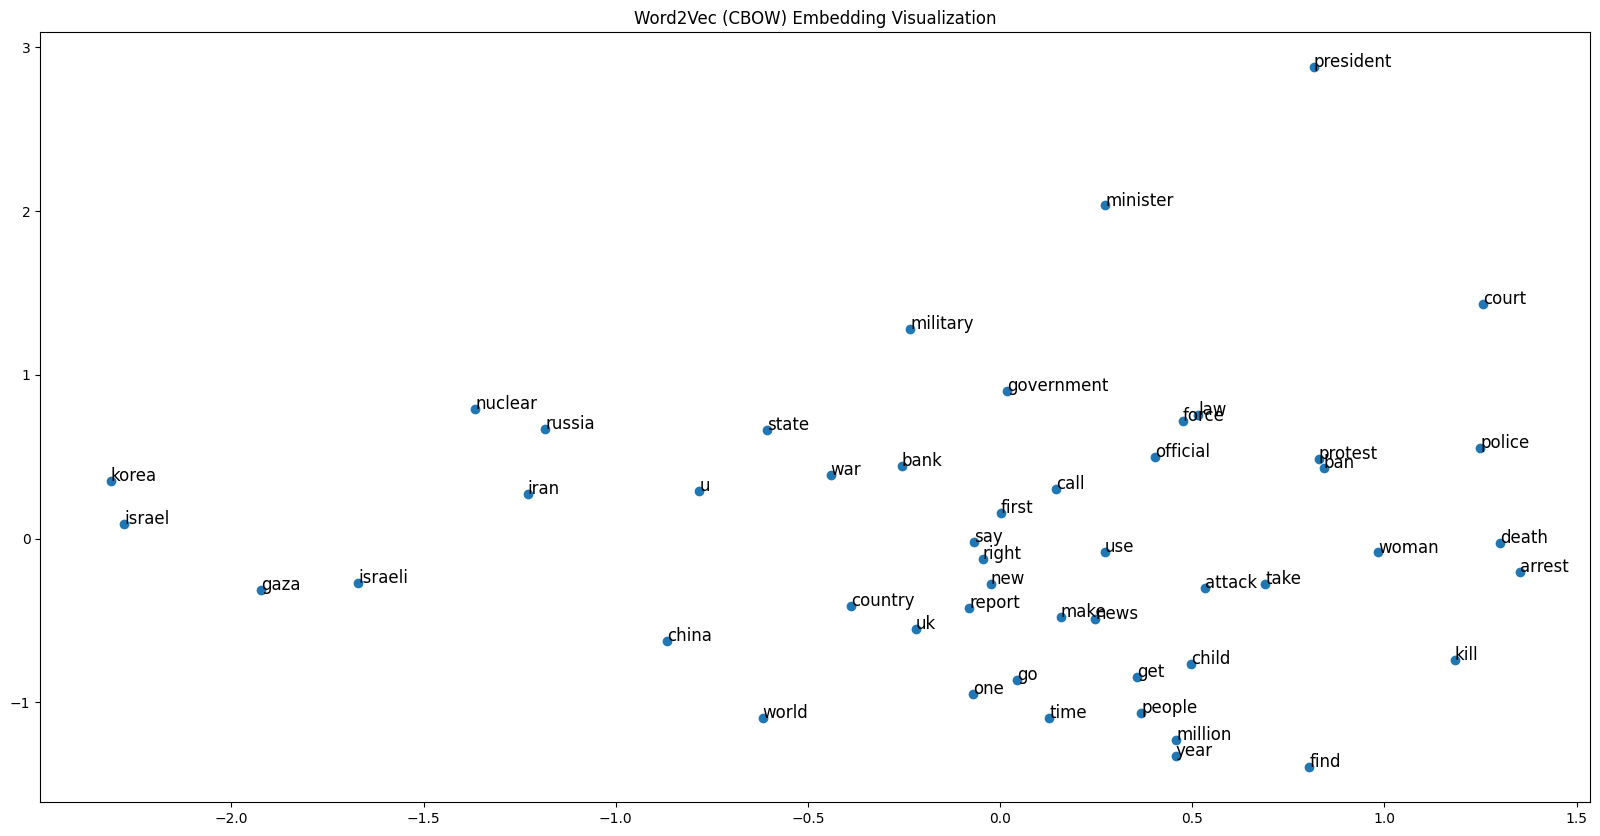

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Select only 50 random words to visualize since the whole vocabulary is not interpretable
words = list(w2v_model.wv.key_to_index.keys())[:50]

# Save each words vector in an array 
X = np.array([w2v_model.wv[word] for word in words])

# PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Plot
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Word2Vec (CBOW) Embedding Visualization")
plt.show()

In [55]:
# Let 's just do few experiments
w2v_model.wv.most_similar('year')

[('month', 0.8929421305656433),
 ('week', 0.8236804604530334),
 ('decade', 0.8155413269996643),
 ('minute', 0.796741783618927),
 ('day', 0.7861267924308777),
 ('hour', 0.7795810103416443),
 ('yr', 0.7683301568031311),
 ('2011', 0.749517560005188),
 ('nearly', 0.7423717975616455),
 ('century', 0.7318993806838989)]

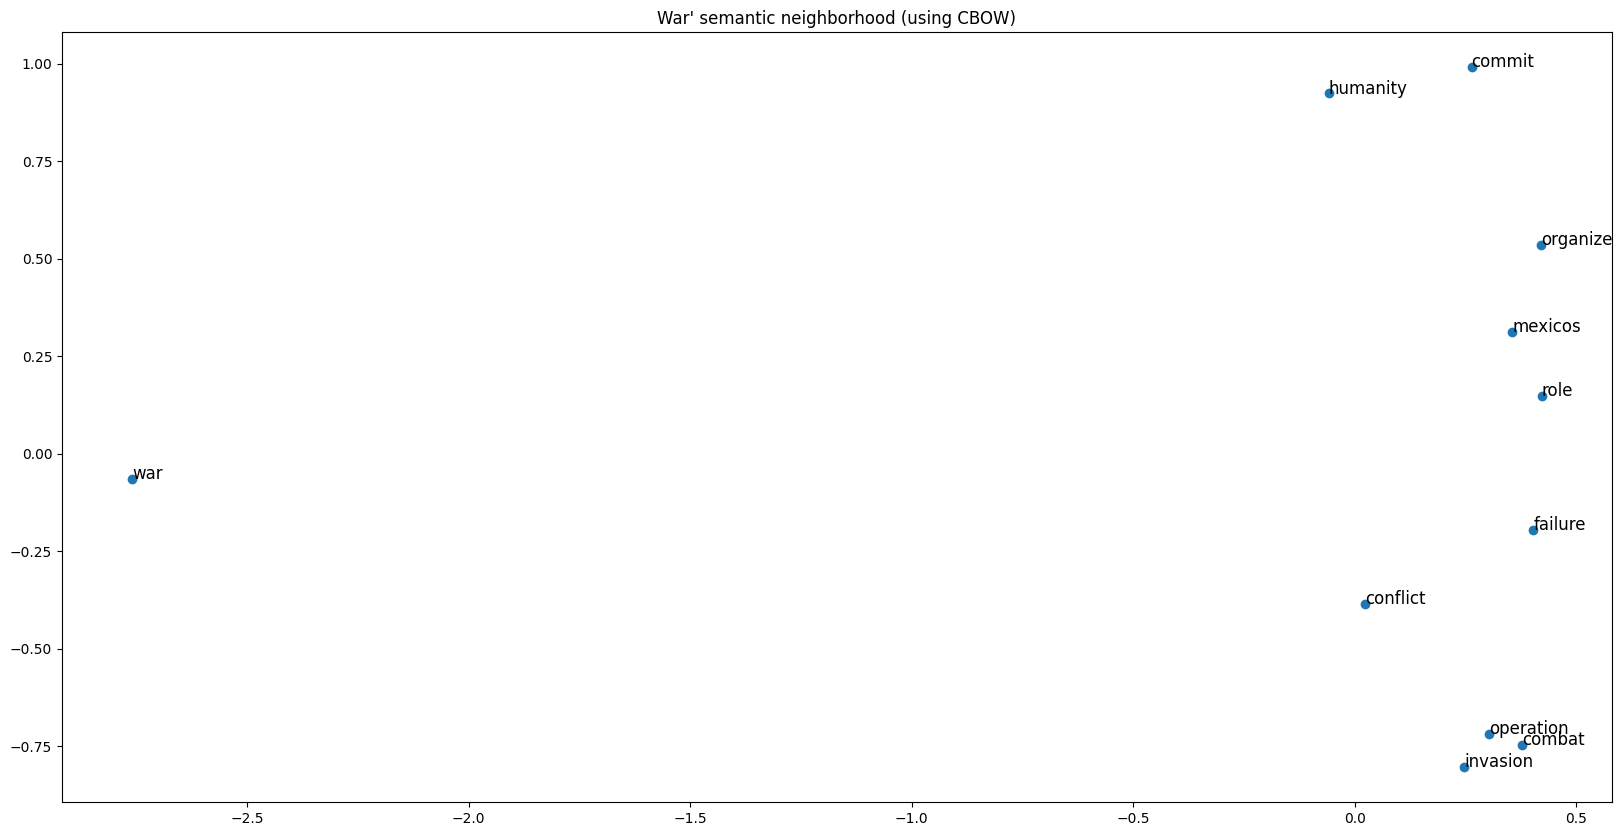

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
similar_words = w2v_model.wv.most_similar("war", topn=10)
words = ["war"] + [w for w, _ in similar_words]

X = np.array([w2v_model.wv[word] for word in words])

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (result[i, 0], result[i, 1]), fontsize=12)

plt.title("War' semantic neighborhood (using CBOW)")
plt.show()

In [57]:
w2v_model.wv.most_similar('war')

[('humanity', 0.7349117398262024),
 ('conflict', 0.7111794352531433),
 ('invasion', 0.6820905804634094),
 ('failure', 0.6661648154258728),
 ('operation', 0.6579480767250061),
 ('organize', 0.6575451493263245),
 ('combat', 0.6560081839561462),
 ('mexicos', 0.6557888388633728),
 ('role', 0.6553688049316406),
 ('commit', 0.6473582983016968)]

In [58]:
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    AdaBoostClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Models i 'll use to classify the data
models = {
    'Decision Tree':DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "xgboost":XGBClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(), 
    'lightgbm':LGBMClassifier(),
    'LogisticRegression':LogisticRegression()
}   


# Create param grids for every and each of these algorithms
# Decision Tree Hyperparameters
params = {
"Decision Tree" : {  
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 10,20],
    'min_samples_split':[5, 10],
    'min_samples_leaf':[1,4,5]
},

# Random Forest Hyperparameters
"Random Forest" : {
    'n_estimators':[100],
    'max_depth':[2, 5],
    'min_samples_split':[2, 5],
    'min_samples_leaf':[2,10]
    },

# AdaBoost hyperparameters
"AdaBoost" : {
    'n_estimators':[100],
    'learning_rate':[0.05,0.1]
},

# Gradient Boosthyperparameters
"Gradient Boost" :{
    'learning_rate':[0.05,0.1],
    'n_estimators':[100],
    "max_depth": [2, 5]
},

# Xgboost hyperparameters
"xgboost" : {
    'n_estimators':[100],
    'learning_rate':[0.05,0.1],
    'max_depth':[2, 5]
},

# SVM hyperparameters
"SVM":{
    'C': [0.1, 1, 10], # regularization parameter
    'kernel':['linear','poly','sigmoid'],
    'gamma': [1, 0.1]
},
# KNN hyperparameters
'KNN' :{
    'n_neighbors':[3,5]
},

# lightgbm hyperparameters
"lightgbm": {
    "n_estimators": [100],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [31], # this is the default value
    'max_depth':[-1] 
},

# Logistic Regression hyperparameters
"LogisticRegression": {
    "C": [0.1, 1, 10],
    "penalty": ['l1',"l2",'elasticnet']
}
}


Start tuning the Decision Tree.

The best cross validation score for the Decision Tree is : 0.6010362445579918



Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.34      0.39       186
           1       0.49      0.62      0.55       192

    accuracy                           0.48       378
   macro avg       0.48      0.48      0.47       378
weighted avg       0.48      0.48      0.47       378



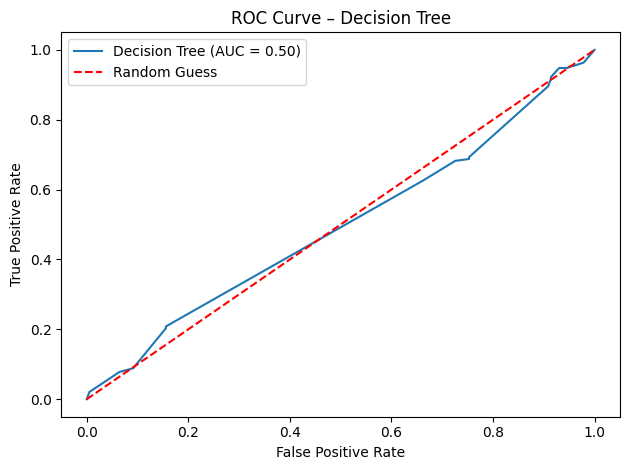

AUC score for --> Decision Tree: 0.50


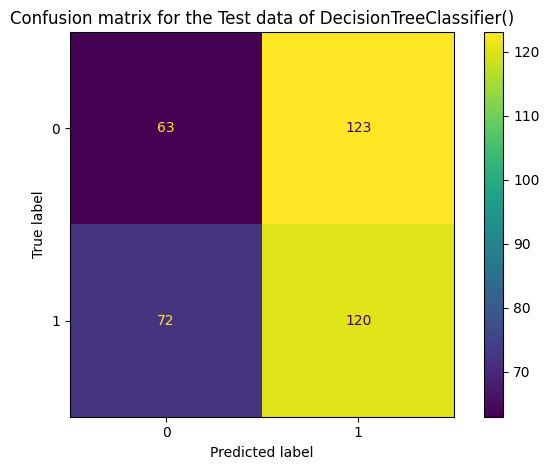

Start tuning the Random Forest.

The best cross validation score for the Random Forest is : 0.6946526556004535



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.75      0.50      0.34       378
weighted avg       0.75      0.51      0.35       378



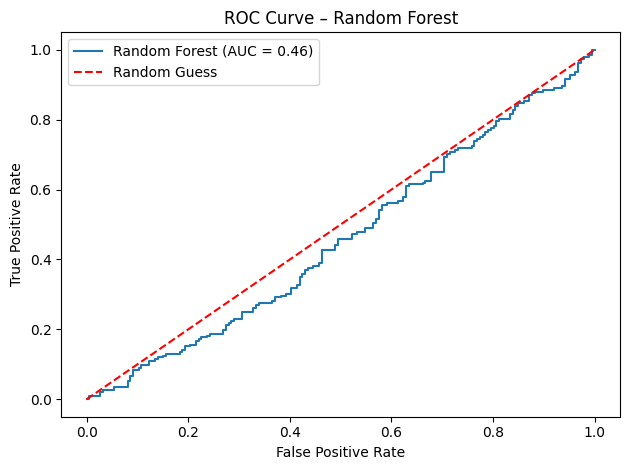

AUC score for --> Random Forest: 0.46


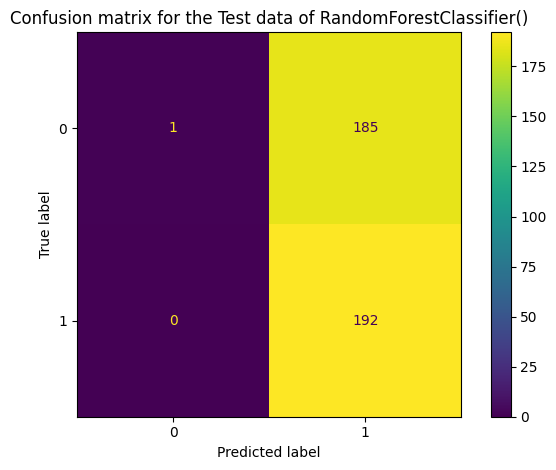

Start tuning the AdaBoost.

The best cross validation score for the AdaBoost is : 0.6994773286311001



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      0.99      0.67       192

    accuracy                           0.50       378
   macro avg       0.25      0.49      0.33       378
weighted avg       0.26      0.50      0.34       378



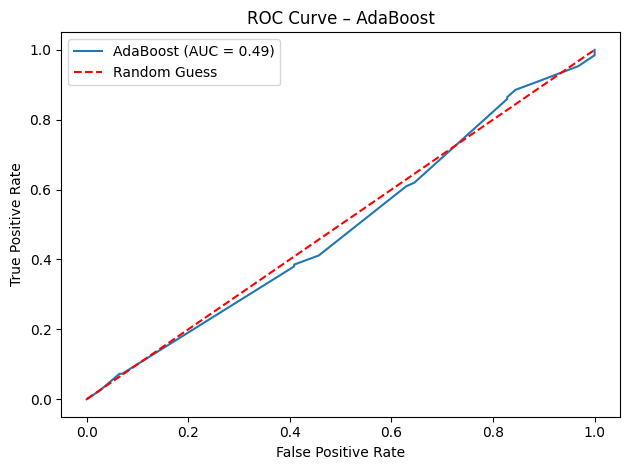

AUC score for --> AdaBoost: 0.49


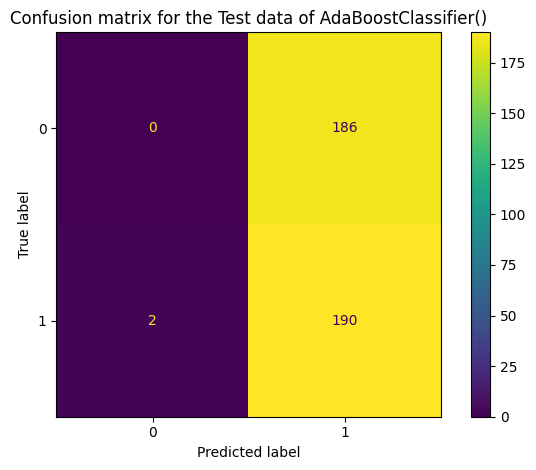

Start tuning the Gradient Boost.

The best cross validation score for the Gradient Boost is : 0.6181818893924621



Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.12      0.19       186
           1       0.50      0.85      0.63       192

    accuracy                           0.49       378
   macro avg       0.47      0.49      0.41       378
weighted avg       0.47      0.49      0.41       378



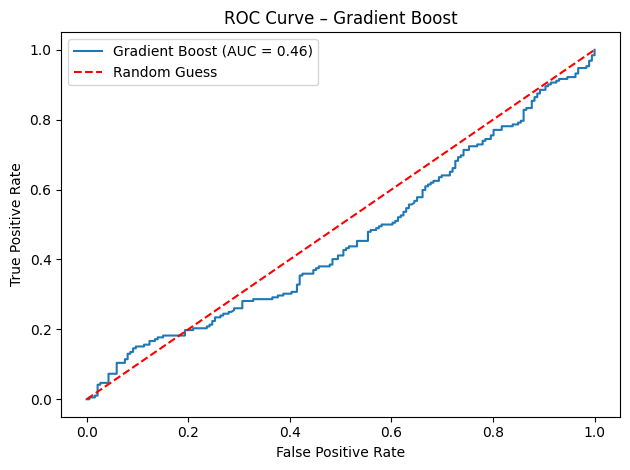

AUC score for --> Gradient Boost: 0.46


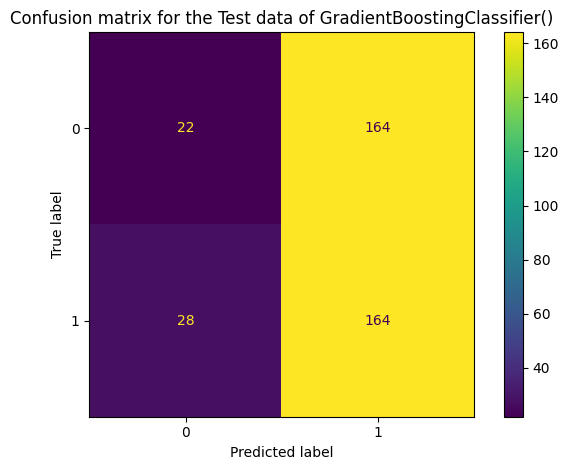

Start tuning the xgboost.

The best cross validation score for the xgboost is : 0.6215598854055483



Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.11      0.18       186
           1       0.50      0.86      0.63       192

    accuracy                           0.49       378
   macro avg       0.47      0.49      0.41       378
weighted avg       0.47      0.49      0.41       378



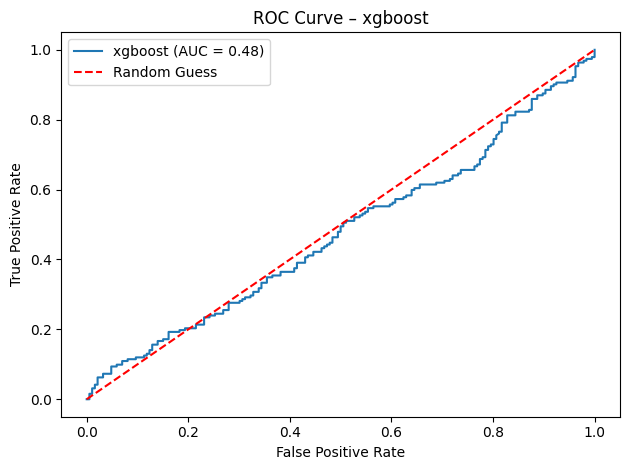

AUC score for --> xgboost: 0.48


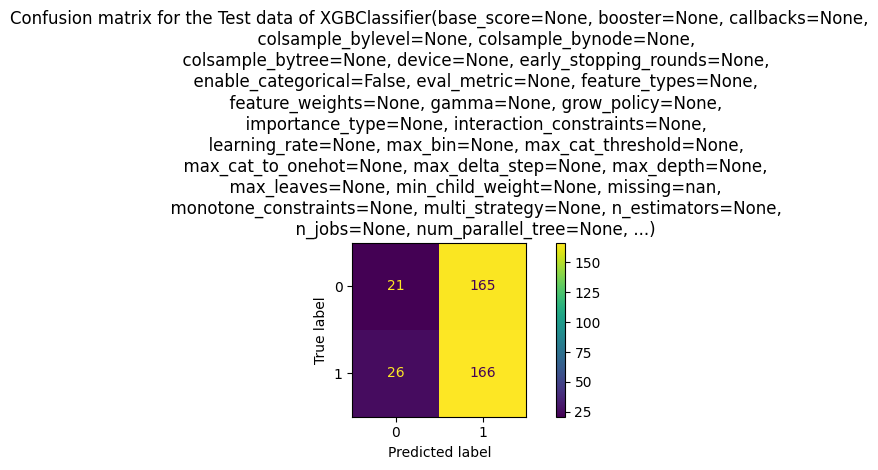

Start tuning the SVM.

The best cross validation score for the SVM is : 0.7021798631476052



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



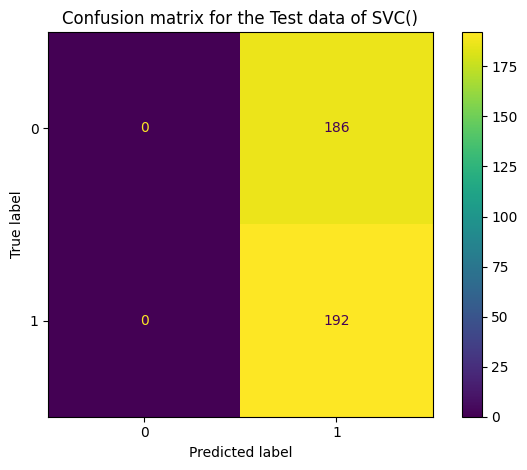

Start tuning the KNN.

The best cross validation score for the KNN is : 0.5812019370663787



Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43       186
           1       0.51      0.63      0.57       192

    accuracy                           0.51       378
   macro avg       0.51      0.51      0.50       378
weighted avg       0.51      0.51      0.50       378



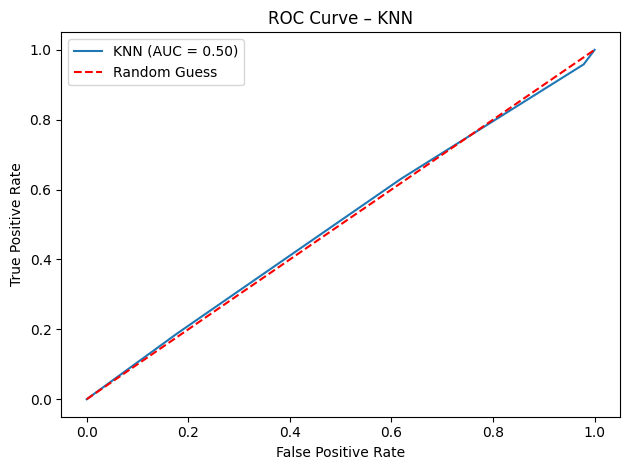

AUC score for --> KNN: 0.50


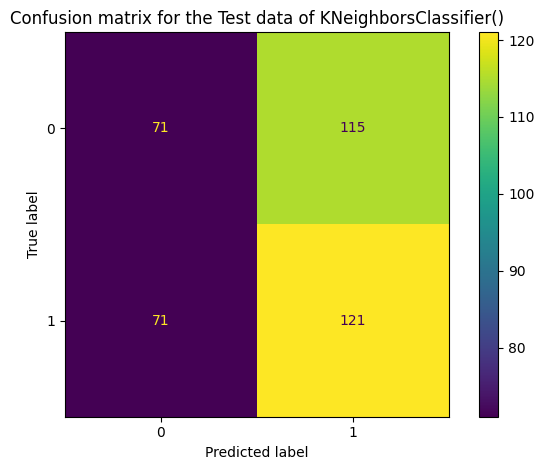

Start tuning the lightgbm.
[LightGBM] [Info] Number of positive: 870, number of negative: 738
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541045 -> initscore=0.164549
[LightGBM] [Info] Start training from score 0.164549

The best cross validation score for the lightgbm is : 0.5634951067132741



Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.27      0.34       186
           1       0.49      0.69      0.57       192

    accuracy                           0.48       378
   macro avg       0.47      0.48      0.46       378
weighted avg       0.47      0.48      0.46       378



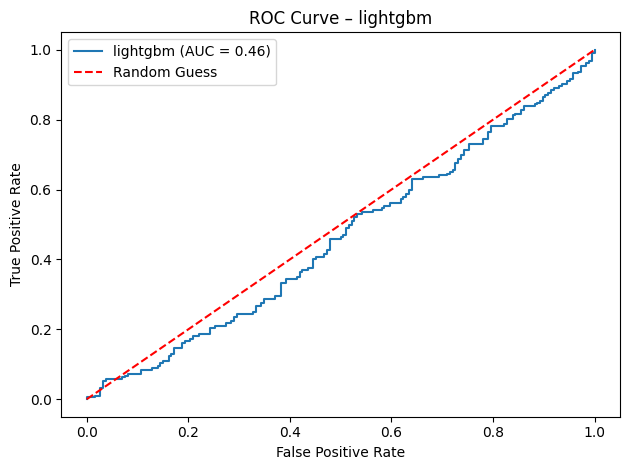

AUC score for --> lightgbm: 0.46


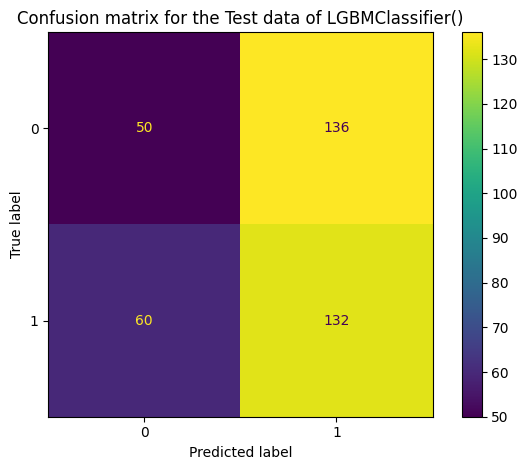

Start tuning the LogisticRegression.

The best cross validation score for the LogisticRegression is : 0.7021798631476052



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



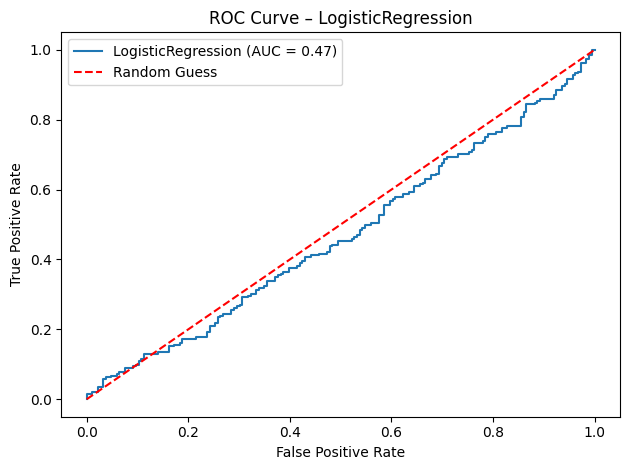

AUC score for --> LogisticRegression: 0.47


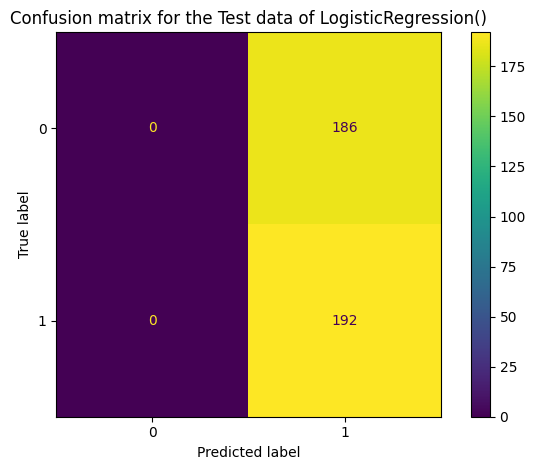

In [59]:
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, roc_auc_score,roc_curve,auc
warnings.filterwarnings("ignore")

# Empty dictionary to save all of the hyperparameter tuning results for each parameter.
result = {}

for model_name, model in models.items():
    print(f"Start tuning the {model_name}.") # only for debugging purposes
    clf = model  # get the model
    hype = params[model_name] # get the hyperparameters for hyperparameter tuning
    
    # grid search cv to get the best combination of hyperparameters
    grid  = GridSearchCV(clf,  
                    hype, 
                    scoring='f1', 
                    n_jobs = -1, # To use the whole cpu and get faster results.
                    cv=5).fit(X_train,y_train)
    
    # update the result dict
    result[model_name] = {
        "best_params": grid.best_params_,
        "best_f1": grid.best_score_,
        "best_model": grid.best_estimator_
    }
    
    print(f'\nThe best cross validation score for the {model_name} is : {grid.best_score_}\n\n')
    best_model = grid.best_estimator_

    # Test set evaluation 
    y_pred = best_model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ---- ROC / AUC (only if supported) ---- (For example SVM)
    if hasattr(best_model, "predict_proba"):
        y_pred_prob = best_model.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve – {model_name}')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        auc_score = roc_auc_score(y_test, y_pred_prob)
        print(f'AUC score for --> {model_name}: {auc_score:.2f}')
        
    # Plot Confusion matrix on ax[1]
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion matrix for the Test data of {model}')
    plt.tight_layout()
    plt.show()

As we can see CBOW is not perforimg so well.

# Neural Network Approach 
 - RNN.
 - Long Short Term Memory (LSTM) was designed to overcome the problems of simple Recurrent Neural Network (RNN) by allowing <br> the network to store data in a sort of memory that it can access at a later times.


In [65]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dropout, GlobalAveragePooling1D, SpatialDropout1D, SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import regularizers

- We are gonna use the Tensorflow (LSTM) we are gonna use the tokenizer provided my tesnsorflow. 

The Tensorflow 's Tokenizer will perform all the necessary pre-processing steps:

a) tokenize into word character (word level) <br>
b) num_words for maximum number of unique tokens <br>
c) filter out the punctuation terms <br>
d) convert all words to lower case <br>
e) convert all words to integer index <br>

lemmatization δεν είναι αναγκαιο σύμφωνα με το παρακάτω paper. (https://arxiv.org/abs/1707.01780".com)

In [46]:
# Define the y values
y_train = df_train['Label'].values
y_test  = df_test['Label'].values

# Copying the data
df_train = df_train.copy()
df_test = df_test.copy()

# Get only the text column for training
df_train = clean_data(df_train)

# Get only the text column for testing
df_test = clean_data(df_test)



X_train_text =concat_headings(df_train)

X_test_text = concat_headings(df_test)

# # Make a list of sentences for train_text
# X_train_text = [
#     tokens
#     for tokens in df_train[df_train.columns[2:27]].values.flatten()
#     if isinstance(tokens, list) and len(tokens) > 1
# ]

# # Make a list of sentences for test_text
# X_test_text = [
#     tokens
#     for tokens in df_test[df_test.columns[2:27]].values.flatten()
#     if isinstance(tokens, list) and len(tokens) > 1
# ]


In [47]:
X_test_text

1611                                            ost case cancer result sheer bad luck rather unhealthy lifestyle diet even inherit gene new research suggest random mutation occur dna cell divide responsible two third adult cancer across wide range tissue , ran dismiss united state effort fight islamic state ploy advance u policy region reality united state act eliminate daesh even interested weaken daesh interested managing , oll one 8 german would join antimuslim march , k royal family prince andrew name u lawsuit underage sex allegation , ome 40 asylumseekers refuse leave bus arrive destination rural northern sweden demand take back malm big city , akistani boat blow self india navy chase four people board vessel near pakistani port city karachi believe kill dramatic episode arabian sea new year eve accord india defence ministry , weden hit third mosque arson attack week , 40 car set alight french new year , alaries top ceo rise twice fast average canadian since recession study , orw

- We need to convert the text (headings) data into numerical representation, so the model will understand it.

In [48]:
# Defining pre-processing parameters
# num_words  = 20000   # maximum number of unique tokens (how many unique word that we want to load in training and testing data)
max_len = 500  # max len of words per day
# trunc_type = 'post' # it is used for padding. Remove the values from sequences larger than maxlen, either at the beginning or at the end of the sequences.
oov_tok = '<OOV>' # oov added to word index in the corpus which is used to build the model. 
# This is used to replace out of vocabulary words (words that are not in our corpus) during text_to_sequence calls.
# all out-of-vocab wordpieces are byte-encoded . 
vocab_size = 20000    # how many unique word that we want to load in training and testing data. Only the top 20000 most frequent words are kept; others are treated as <OOV>.


# The Tokenizer from TensorFlow split sentences into words and encode them into integers.
tokenizer = Tokenizer(num_words=vocab_size , # the maximum number of words to keep in input text.
                      char_level = False, # if True every character will be treated as token.
                      oov_token="<OOV>") # we set oov_token to OOV 

# Fit this tokenizer on the training text
tokenizer.fit_on_texts(X_train_text)

# represent each sentence by sequences of numbers (vectors) using texts_to_sequences from Tokenizer object
X_train_seq = tokenizer.texts_to_sequences(X_train_text) 
X_test_seq  = tokenizer.texts_to_sequences(X_test_text)

# we padded the sequence so that we can have same length of each sequence.
# We use post padding in order to fullfill the sentences with `Zeros at the end ` and get the same length for each sentence.
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len , padding='post',) 
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len , padding='post')

In [66]:
tokenizer.word_docs

defaultdict(int,
            {'brussia': 97,
             'year': 812,
             'lawsuit': 49,
             'faces': 163,
             '2': 457,
             'has': 1426,
             'sentenced': 175,
             'tanks': 76,
             'georgia': 58,
             'fighting': 151,
             'gets': 209,
             'they': 936,
             'today': 273,
             'defense': 144,
             'bno': 22,
             'sanctions': 149,
             'kidnapping': 43,
             'brink': 42,
             'for': 1579,
             'hostilities': 8,
             'rice': 26,
             'bso': 15,
             'hundred': 28,
             'are': 1313,
             'help': 319,
             'what': 515,
             'iraq': 377,
             'veto': 15,
             'ehud': 9,
             'old': 541,
             'banned': 199,
             'surge': 33,
             'qaeda': 122,
             'moving': 58,
             'by': 1473,
             'three': 379,
             'its'

In [49]:
# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

33682

In [50]:
word_index

{'<OOV>': 1,
 'say': 2,
 'u': 3,
 'kill': 4,
 'year': 5,
 'government': 6,
 'world': 7,
 'new': 8,
 'israel': 9,
 'people': 10,
 'police': 11,
 'war': 12,
 'country': 13,
 'attack': 14,
 'state': 15,
 'find': 16,
 'china': 17,
 'woman': 18,
 'one': 19,
 'use': 20,
 'force': 21,
 'call': 22,
 'israeli': 23,
 'right': 24,
 'protest': 25,
 'president': 26,
 'report': 27,
 'take': 28,
 'korea': 29,
 'ban': 30,
 'child': 31,
 'make': 32,
 'law': 33,
 'death': 34,
 'military': 35,
 'iran': 36,
 'first': 37,
 'time': 38,
 'uk': 39,
 'minister': 40,
 'russia': 41,
 'get': 42,
 'bank': 43,
 'court': 44,
 'news': 45,
 'go': 46,
 'nuclear': 47,
 'arrest': 48,
 'official': 49,
 'million': 50,
 'gaza': 51,
 'man': 52,
 'amp': 53,
 'palestinian': 54,
 'two': 55,
 'drug': 56,
 'un': 57,
 'plan': 58,
 'north': 59,
 'day': 60,
 'could': 61,
 'leader': 62,
 'may': 63,
 'russian': 64,
 'n': 65,
 'want': 66,
 'human': 67,
 'show': 68,
 'fire': 69,
 'give': 70,
 'would': 71,
 'face': 72,
 'strike': 73,
 'g

In [51]:
print('Shape of training tensor: ', X_train_pad.shape,'\n')
print('Shape of testing tensor: ', X_test_pad.shape)

Shape of training tensor:  (1608, 500) 

Shape of testing tensor:  (378, 500)


In [52]:
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)


Number of Documents:  1608
Number of Words:  20000


In [53]:
# It is every days heading 's in one sentence (and we have transform each word in a number) in a vector of numbers.
X_train_pad

array([[  805,  2804,    55, ...,     0,     0,     0],
       [  715,   341,   390, ...,     0,     0,     0],
       [ 1580, 10308,  5387, ...,     0,     0,     0],
       ...,
       [ 5378,    82,  3619, ...,     0,     0,     0],
       [  141,  2654,   111, ...,     0,     0,     0],
       [ 7877,   606,    16, ...,     0,     0,     0]],
      shape=(1608, 500), dtype=int32)

# Simple RNN Model

In [80]:
# Define parameters
vocab_size = 20000 
embedding_dim = 128
drop_value = 0.2
n_dense = 24

# Sequential calls for Keras sequential model in which layer added in a sequence. 
model = Sequential()

# The embedding layer maps convert the input tokens to dense vectors of embedding_dim dimensions.
model.add(Embedding(input_dim = vocab_size, # specifies the total number of unique words in the vocabulary
                    output_dim=embedding_dim, # determines the size of the embedding vectors
                    input_length = max_len)) #

model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model = Sequential()

model.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    input_length=max_len,
    mask_zero=True   # VERY important for padded sequences
))

model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.build(input_shape=(None, max_len))
model.compile(loss='binary_crossentropy',  # 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 500, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 100)            │        22,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,583,001 (9.85 MB)

 Trainable params: 2,583,001 (9.85 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

# model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_pad,
                    y_train,
                    epochs=num_epochs, 
                    validation_data=(X_test_pad, y_test),
                    callbacks =[early_stop],
                    verbose=2) # 2 = one line per epoch

Epoch 1/30
51/51 - 6s - 113ms/step - accuracy: 0.5100 - loss: 0.7091 - val_accuracy: 0.5265 - val_loss: 0.6945
Epoch 2/30
51/51 - 4s - 74ms/step - accuracy: 0.5211 - loss: 0.6963 - val_accuracy: 0.5026 - val_loss: 0.7031
Epoch 3/30
51/51 - 4s - 71ms/step - accuracy: 0.5249 - loss: 0.6902 - val_accuracy: 0.4841 - val_loss: 0.7170
Epoch 4/30
51/51 - 5s - 89ms/step - accuracy: 0.5187 - loss: 0.6934 - val_accuracy: 0.5132 - val_loss: 0.7053


In [57]:
model.evaluate(X_test_pad, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5079 - loss: 0.6934


[0.6934186220169067, 0.5079365372657776]

# LSTM Model

In [75]:
# Define parameter
n_lstm = 128
drop_lstm = 0.2
# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

In [76]:
model.build(input_shape=(None, max_len))
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)